1. check embedding 结果

正在读取 /Users/kiancai/STA24/CWD/STAi/MiCoGPT/data/try2_withCC/taxa_dnabert_embeddings.pkl ...
>>> 读取成功！

====== 基本信息 ======
总共有 1117 个 Taxa (例如 genus)
示例 taxa 名称: d__Bacteria; p__Proteobacteria; c__Gammaproteobacteria; o__Xanthomonadales; f__Xanthomonadaceae; g__Stenotrophomonas
示例 taxa embedding 维度: 768
Embedding 类型: <class 'numpy.ndarray'>

====== 转换为 DataFrame ======
                                                         0         1    \
Taxonomy                                                                 
d__Bacteria; p__Proteobacteria; c__Gammaproteob... -0.045863  0.087040   
d__Bacteria; p__Bdellovibrionota; c__Bdellovibr...  0.046261  0.004577   
d__Bacteria; p__Proteobacteria; c__Gammaproteob... -0.028800  0.048729   
d__Bacteria; p__Firmicutes; c__Clostridia; o__E... -0.000801  0.127049   
d__Bacteria; p__Proteobacteria; c__Gammaproteob... -0.060799  0.011904   

                                                         2         3    \
Taxonomy                            

/opt/micromamba/envs/MiCoSeq_dev_plot/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP 完成！


/var/folders/23/yxbb6h094616_yvzj1181f0m0000gn/T/ipykernel_62639/1377988941.py:71: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(taxon, (df_umap["UMAP1"][i], df_umap["UMAP2"][i]))


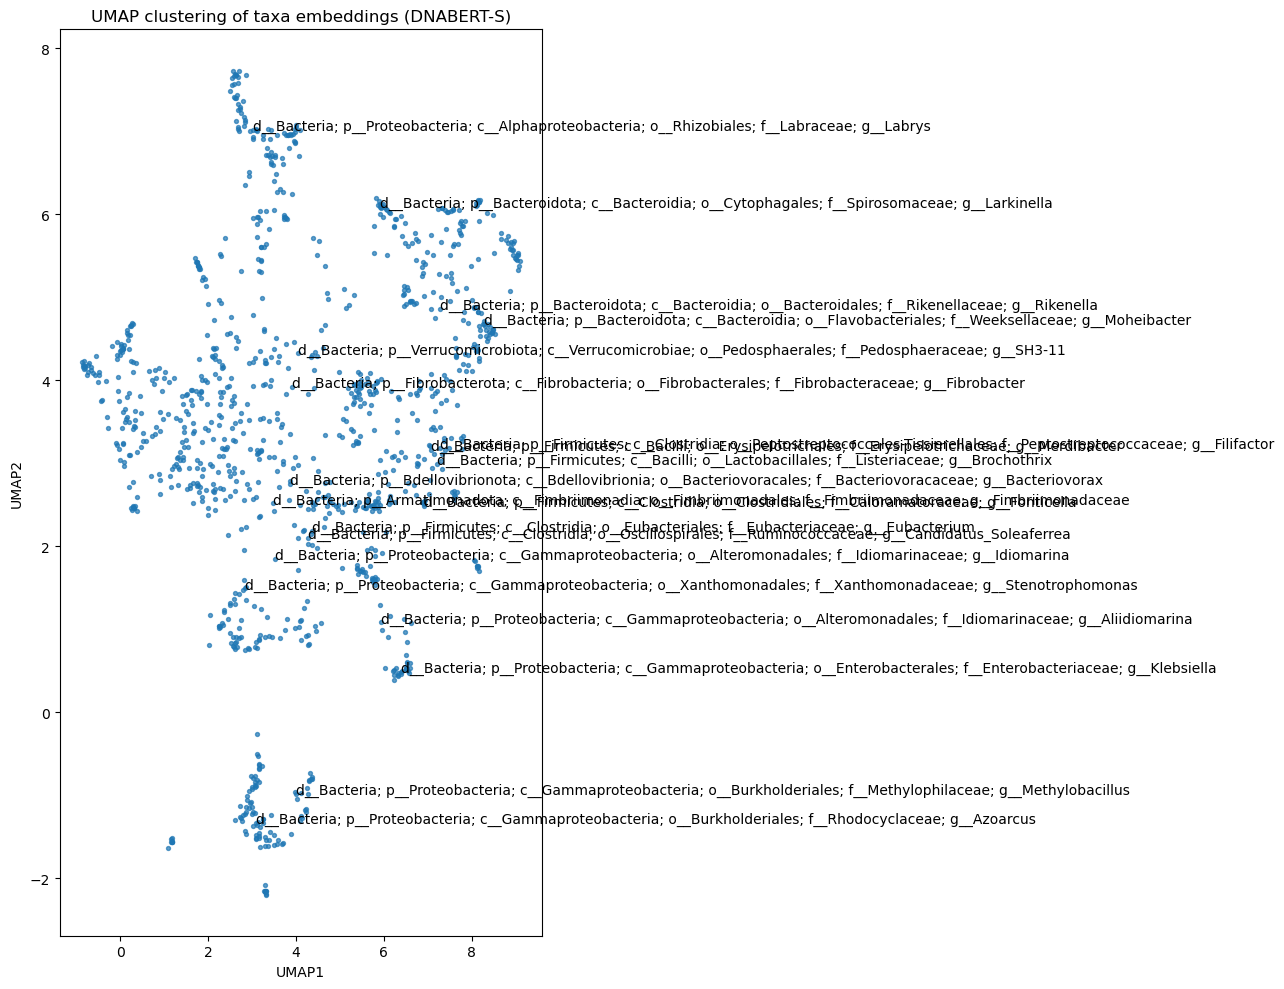


=== 脚本执行完毕！===



In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from umap import UMAP

# ============================================================
# 1. 读取 PKL 文件
# ============================================================
PICKLE_FILE = "/Users/kiancai/STA24/CWD/STAi/MiCoGPT/data/try2_withCC/taxa_dnabert_embeddings.pkl"

print(f"正在读取 {PICKLE_FILE} ...")
with open(PICKLE_FILE, "rb") as f:
    embeddings_dict = pickle.load(f)

print(">>> 读取成功！")

# ============================================================
# 2. 基本信息检查
# ============================================================

print("\n====== 基本信息 ======")
num_taxa = len(embeddings_dict)
example_key = next(iter(embeddings_dict))
example_vec = embeddings_dict[example_key]

print(f"总共有 {num_taxa} 个 Taxa (例如 genus)")
print(f"示例 taxa 名称: {example_key}")
print(f"示例 taxa embedding 维度: {len(example_vec)}")
print(f"Embedding 类型: {type(example_vec)}")

# ============================================================
# 3. 转换为 DataFrame
# ============================================================

print("\n====== 转换为 DataFrame ======")
df = pd.DataFrame.from_dict(
    embeddings_dict,
    orient="index"
)
df.index.name = "Taxonomy"

print(df.head())
print(f"\nDataFrame 形状: {df.shape}")

# ============================================================
# 4. 用 UMAP 进行降维
# ============================================================
print("\n====== 执行 UMAP 降维 ======")

umap_model = UMAP(
    n_neighbors=15,
    min_dist=0.1,
    metric="cosine",
    random_state=42
)

embedding_2d = umap_model.fit_transform(df.values)
df_umap = pd.DataFrame(embedding_2d, columns=["UMAP1", "UMAP2"], index=df.index)

print("UMAP 完成！")

# ============================================================
# 5. 可视化 UMAP
# ============================================================
plt.figure(figsize=(12, 10))
plt.scatter(df_umap["UMAP1"], df_umap["UMAP2"], s=8, alpha=0.7)

# 注释：为了避免太乱，只标注少量点
for i, taxon in enumerate(df_umap.index[:20]):  # 前20个
    plt.annotate(taxon, (df_umap["UMAP1"][i], df_umap["UMAP2"][i]))

plt.title("UMAP clustering of taxa embeddings (DNABERT-S)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.tight_layout()
plt.show()

print("\n=== 脚本执行完毕！===\n")
